# ML/DL for Everyone

### 출처

- 모두를 위한 딥러닝 시즌2
- 링크: [모두를 위한 딥러닝 시즌2](https://www.youtube.com/watch?v=7eldOrjQVi0&list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C)

<br/>

## 경사하강법(Gradient Descent)

<br/>

<hr/>

### 모델 정의

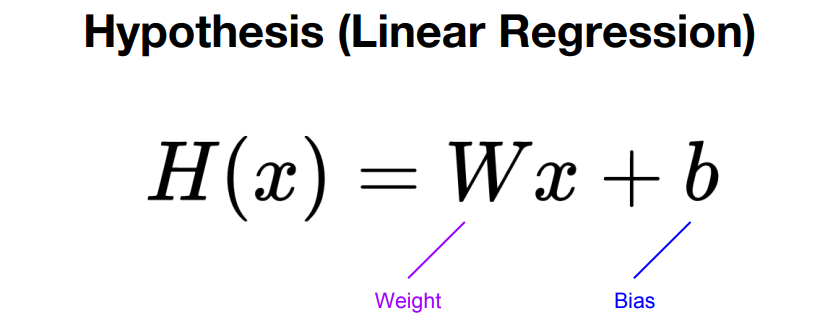

위 공식은 아주 간단한 1차함수 모델로 W와 b라는 변수를 학습해 주어진 데이터에 최적화하는 것이다. 코드로 나타내면 아래와 같다. 파이토치를 이용하고, torch.zeros를 이용해 W와 b를 초기화하고 Hypothesis를 구한다.

```python
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
hypothesis = x_train * W + b
```

<br/><br/>

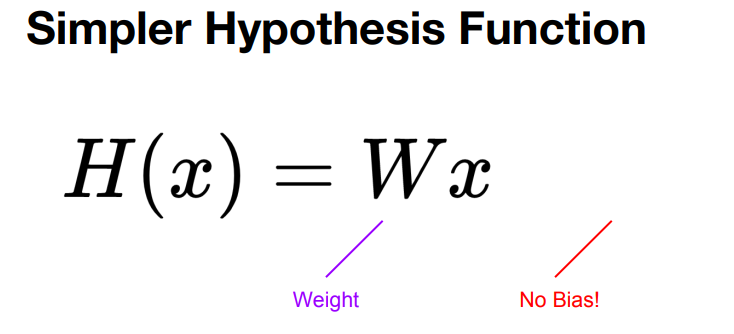

이 공식은 더 간단한 1차함수 모델이다. 이 모델은 W라는 상수 하나만 학습할 수 있는 것이다. 경사하강법은 더 쉽게 이해하기 위해 이 모델을 사용할 것이다.

```python
W = torch.zeros(1, requires_grad=True)
hypothesis = x_train * W + b
```

<br/><br/>

### 데이터셋

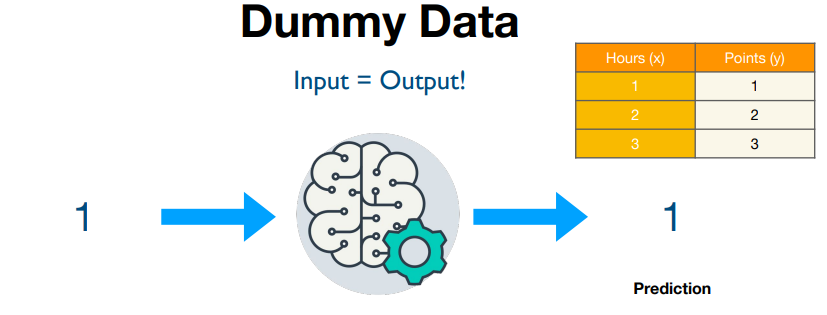

In [1]:
import torch
import torch.optim as optim

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

입력 x와 출력 y가 같은 데이터셋이다. W = 1 일 때, dataset에 있는 모든 데이터의 정확한 값을 예측할 수 있다. (y = 1*x)

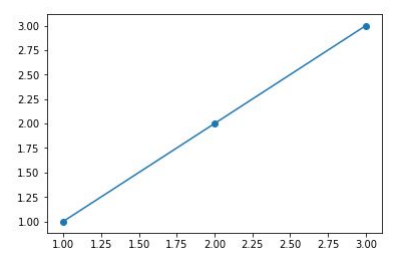


### Cost function: Intuition

우리는 어떻게 모델의 좋고 나쁨을 평가할 수 있을까? Cost Function을 사용하면 된다!!<br/>
cost가 작을수록 실제 데이터값과 비슷하고, 크면 클수록 실제 데이터와 멀어지게 되기 때문에 이 정보를 이용하면 된다.<br/>
이 경우는 cost가 직관적인 경우기 때문에 y=x을 예측할 수 있었고, cost는 W에 대해 아래와 같은 그래프를 그릴 수 있다.

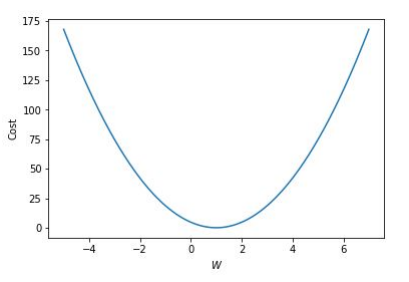

### Cost function: MSE

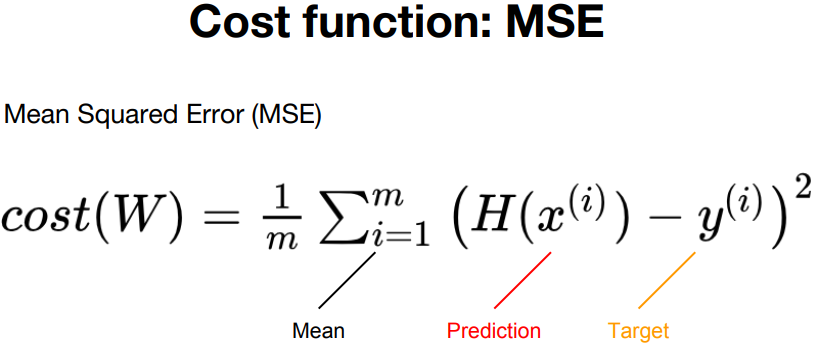

Linear Regression에서 공부했다시피 MSE를 통해 cost를 구하는 방법도 있다.

```python
 cost = torch.mean((hypothesis - y_train) ** 2)
```

<br/>

### Gradient Descent

- 평평한 값을 향해 간다. (미분했을 때 0이 되어야 함)

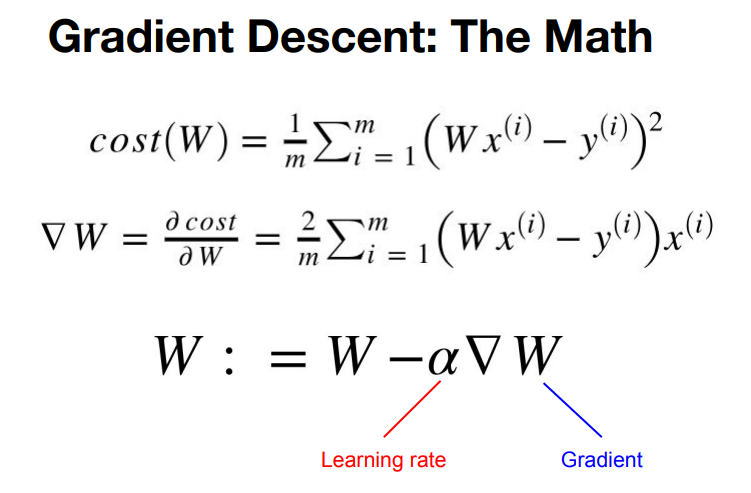

In [3]:
W = torch.zeros(1)

gradient = 2 * torch.mean((W * x_train - y_train) * x_train)
lr = 0.1
W -= lr * gradient

<br/>

### 전체 코드

- Epoch이란 데이터로 학습한 횟수를 의미
- Cost가 점차 0으로 수렴한다

In [4]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1)
# learning rate 설정
lr = 0.1
nb_epochs = 10
for epoch in range(nb_epochs + 1):
 
    # H(x) 계산
    hypothesis = x_train * W

    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * x_train - y_train) * x_train)
    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
    epoch, nb_epochs, W.item(), cost.item()
    ))
    # cost gradient로 H(x) 개선
    W -= lr * gradient
    
print("학습완료")

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746666
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000
학습완료


<br/>

### Gradient Descent with torch.optim

- torch.optim을 이용해 경사하강법을 적용할 수 있다

    1. Optimizer 정의
    2. optimizer.zero_grad()로 gradient를 0으로 초기화
    3. cost.backward()로 gradient를 계산
    4. optimizer.step()으로 gradient descent

```python
# optimizer 설정
optimizer = optim.SGD([W], lr=0.15)

# cost로 H(x) 개선
optimizer.zero_grad()
cost.backward()
optimizer.step()
```

In [8]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

# 모델 초기화
W = torch.zeros(1, requires_grad=True)

# Optimizer 설정
optimizer = optim.SGD([W], lr=0.15)

epochs = 10
for epoch in range(epochs+1):
    
    # H(x) 
    hypothesis = x_train * W
    
    # Cost(loss)
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
    epoch, nb_epochs, W.item(), cost.item()
    ))
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746667
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000
